## Import Packages 

In [1]:
from data import shortestpath, dataset
from model import shortestPathModel
from twostage import sklearnPred
from evalm import calUnambSPO

In [2]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tqdm import tqdm

## Build Optimizer

In [3]:
# model for shortest path
grid = (5,5)
sp_model = shortestPathModel(grid)

Academic license - for non-commercial use only - expires 2021-06-13
Using license file C:\Users\Apocrypse\gurobi.lic


## Build Predictor

In [4]:
# linear regression
lr = LinearRegression()
lr_twostage = sklearnPred(lr, sp_model)

In [5]:
# random forest
rf = RandomForestRegressor(random_state=135)
rf_twostage = sklearnPred(rf, sp_model)

## Experiments

### Training Set Size = 100, Noise Half−width = 0 

In [6]:
# set up
n = 100 # number of data
p = 5 # size of feature
e = 0 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [7]:
# init DataFrame
df1_lr = pd.DataFrame(columns = degs)
df1_rf = pd.DataFrame(columns = degs)

In [8]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        lr_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df1_lr = df1_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 394.75it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.03it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.96it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.71it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.18it/s]


Normalized SPO Loss: 0.14%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 358.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.23it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.19it/s]


Normalized SPO Loss: 1.89%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.85it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.52it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.43it/s]


Normalized SPO Loss: 6.64%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 375.55it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.51it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.85it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.98it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.12it/s]


Normalized SPO Loss: 0.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 386.16it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.39it/s]


Normalized SPO Loss: 1.44%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.79it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.70it/s]


Normalized SPO Loss: 5.82%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 354.89it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.57it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.82it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 342.21it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.39it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.74it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.55it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.46it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.57it/s]


Normalized SPO Loss: 2.30%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 421.32it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.21it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.68it/s]


Normalized SPO Loss: 10.34%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 283.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.19it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.83it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 360.68it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.09it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.46it/s]


Normalized SPO Loss: 0.21%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 323.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.55it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.11it/s]


Normalized SPO Loss: 3.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 261.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.07it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.79it/s]


Normalized SPO Loss: 9.93%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 387.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.29it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 338.15it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.38it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.52it/s]


Normalized SPO Loss: 0.15%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 378.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.73it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.42it/s]


Normalized SPO Loss: 2.19%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 298.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.16it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.24it/s]


Normalized SPO Loss: 7.85%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 286.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.67it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.86it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 431.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.97it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.67it/s]


Normalized SPO Loss: 0.19%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 376.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.64it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.12it/s]


Normalized SPO Loss: 2.64%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 335.90it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 293.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.56it/s]


Normalized SPO Loss: 9.07%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.80it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.46it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 387.08it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.86it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.90it/s]


Normalized SPO Loss: 0.10%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 282.50it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 259.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.23it/s]


Normalized SPO Loss: 1.48%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 400.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 392.04it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.19it/s]


Normalized SPO Loss: 4.98%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 367.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.30it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.00it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.82it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.16it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.09it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.60it/s]


Normalized SPO Loss: 2.94%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 266.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.19it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.32it/s]


Normalized SPO Loss: 9.95%



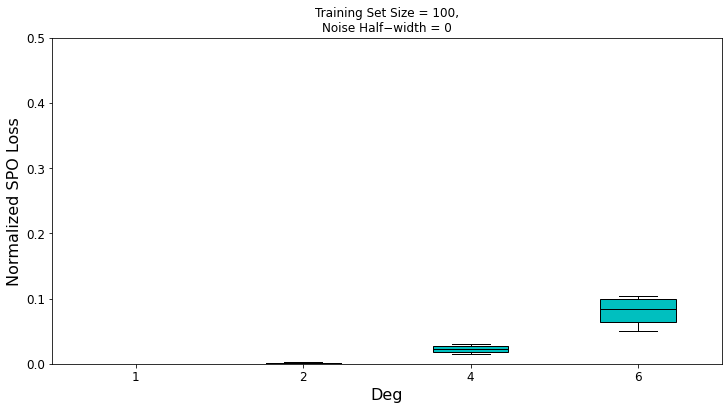

In [9]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df1_lr, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0')
plt.show()

In [10]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        rf_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df1_rf = df1_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.14it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.36it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.29it/s]


Normalized SPO Loss: 0.64%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 313.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.54it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.38it/s]


Normalized SPO Loss: 1.95%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 372.75it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.45it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.90it/s]


Normalized SPO Loss: 4.95%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 289.74it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.42it/s]


Normalized SPO Loss: 10.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.96it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.67it/s]


Normalized SPO Loss: 0.66%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 351.82it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.65it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.97it/s]


Normalized SPO Loss: 1.69%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.06it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.43it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.65it/s]


Normalized SPO Loss: 5.01%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 389.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.74it/s]


Normalized SPO Loss: 12.35%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.58it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.83it/s]


Normalized SPO Loss: 0.59%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.00it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.83it/s]


Normalized SPO Loss: 1.33%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.40it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.90it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.37it/s]


Normalized SPO Loss: 4.72%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 367.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.31it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.09it/s]


Normalized SPO Loss: 11.46%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.15it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.55it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.68it/s]


Normalized SPO Loss: 0.70%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 372.88it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.46it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.05it/s]


Normalized SPO Loss: 1.72%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 367.07it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.93it/s]


Normalized SPO Loss: 6.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 316.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.91it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.67it/s]


Normalized SPO Loss: 14.39%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 381.24it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.75it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.29it/s]


Normalized SPO Loss: 0.53%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 351.81it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.18it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.22it/s]


Normalized SPO Loss: 1.29%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.43it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.17it/s]


Normalized SPO Loss: 3.99%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.45it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.52it/s]


Normalized SPO Loss: 11.25%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 382.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 402.97it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.63it/s]


Normalized SPO Loss: 0.73%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 330.36it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.74it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.22it/s]


Normalized SPO Loss: 1.81%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 264.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 250.12it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.07it/s]


Normalized SPO Loss: 5.03%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 308.52it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.89it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.65it/s]


Normalized SPO Loss: 11.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 338.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.29it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.54it/s]


Normalized SPO Loss: 0.56%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 286.08it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.55it/s]


Normalized SPO Loss: 1.37%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 235.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.98it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.21it/s]


Normalized SPO Loss: 5.22%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 298.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 261.29it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.91it/s]


Normalized SPO Loss: 10.66%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 203.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 243.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.06it/s]


Normalized SPO Loss: 0.64%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 199.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 239.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.81it/s]


Normalized SPO Loss: 1.62%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 256.99it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 252.05it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.23it/s]


Normalized SPO Loss: 4.71%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 299.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.28it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.62it/s]


Normalized SPO Loss: 10.56%



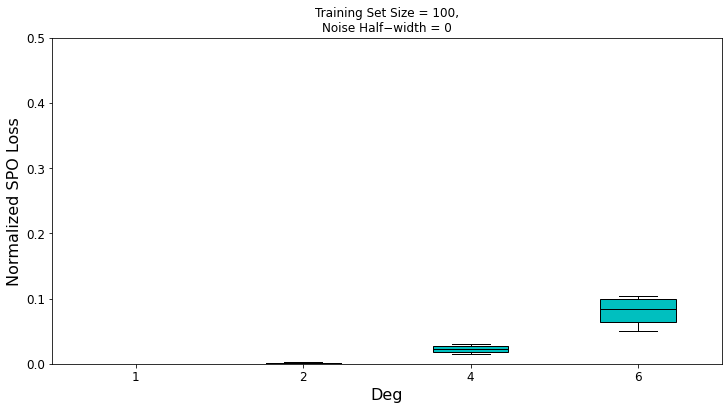

In [11]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df1_lr, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0')
plt.show()

### Training Set Size = 100, Noise Half−width = 0.5 

In [12]:
# set up
n = 100 # number of data
p = 5 # size of feature
e = 0.5 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [13]:
# init DataFrame
df2_lr = pd.DataFrame(columns = degs)
df2_rf = pd.DataFrame(columns = degs)

In [14]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        lr_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df2_lr = df2_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 244.55it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 276.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.42it/s]


Normalized SPO Loss: 16.33%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 290.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.17it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.73it/s]


Normalized SPO Loss: 10.93%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 253.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 269.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.94it/s]


Normalized SPO Loss: 8.79%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 295.15it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 268.86it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.26it/s]


Normalized SPO Loss: 12.20%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 254.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 266.46it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.79it/s]


Normalized SPO Loss: 15.90%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 245.43it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 255.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.68it/s]


Normalized SPO Loss: 10.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 306.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.79it/s]


Normalized SPO Loss: 6.91%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.16it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.53it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.44it/s]


Normalized SPO Loss: 9.41%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 246.35it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 236.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.90it/s]


Normalized SPO Loss: 18.59%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 266.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.51it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.37it/s]


Normalized SPO Loss: 12.84%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 279.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.81it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.49it/s]


Normalized SPO Loss: 11.15%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 279.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 251.06it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.92it/s]


Normalized SPO Loss: 17.25%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.70it/s]


Normalized SPO Loss: 17.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 309.46it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 235.89it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.70it/s]


Normalized SPO Loss: 12.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 278.52it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 284.28it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.89it/s]


Normalized SPO Loss: 10.42%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.99it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.65it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.17it/s]


Normalized SPO Loss: 16.17%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 238.34it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.45it/s]


Normalized SPO Loss: 17.55%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 293.18it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 275.71it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.56it/s]


Normalized SPO Loss: 12.51%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 386.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.24it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.81it/s]


Normalized SPO Loss: 9.34%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 407.92it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 381.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.75it/s]


Normalized SPO Loss: 13.14%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 371.33it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.47it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.89it/s]


Normalized SPO Loss: 16.36%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 439.76it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.56it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.21it/s]


Normalized SPO Loss: 10.77%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 385.68it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 396.83it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.21it/s]


Normalized SPO Loss: 8.73%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.70it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.69it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.70it/s]


Normalized SPO Loss: 13.76%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.43it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 398.85it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.69it/s]


Normalized SPO Loss: 16.40%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 421.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 382.24it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.93it/s]


Normalized SPO Loss: 11.23%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 378.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 442.25it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.56it/s]


Normalized SPO Loss: 8.87%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 287.54it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.03it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.27it/s]


Normalized SPO Loss: 13.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 314.32it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.13it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.91it/s]


Normalized SPO Loss: 16.23%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 271.35it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.07it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.81it/s]


Normalized SPO Loss: 10.90%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.05it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.87it/s]


Normalized SPO Loss: 10.88%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 401.69it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.57it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.04it/s]


Normalized SPO Loss: 18.40%



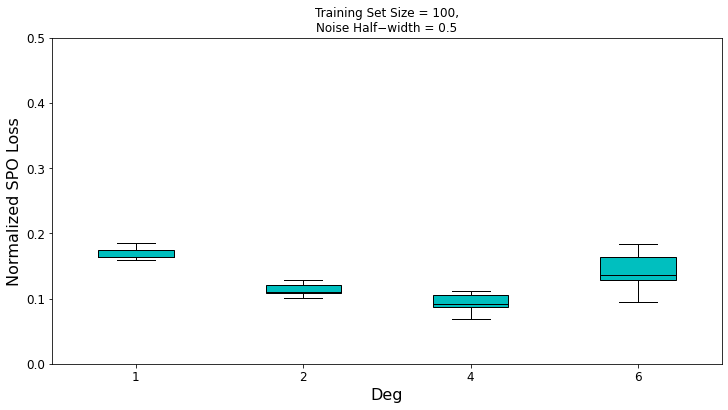

In [15]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df2_lr, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0.5')
plt.show()

In [16]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        rf_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df2_rf = df2_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 439.77it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.73it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.64it/s]


Normalized SPO Loss: 19.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 271.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.77it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.45it/s]


Normalized SPO Loss: 14.53%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 428.54it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 259.76it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.33it/s]


Normalized SPO Loss: 13.56%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 369.16it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 244.68it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.33it/s]


Normalized SPO Loss: 16.87%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 274.71it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.50it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.76it/s]


Normalized SPO Loss: 18.70%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 321.55it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 214.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.47it/s]


Normalized SPO Loss: 13.28%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.11it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 277.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.81it/s]


Normalized SPO Loss: 13.15%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 369.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 222.98it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.58it/s]


Normalized SPO Loss: 16.94%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 273.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 270.54it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.30it/s]


Normalized SPO Loss: 19.72%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 305.69it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.15it/s]


Normalized SPO Loss: 15.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 255.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 286.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.25it/s]


Normalized SPO Loss: 14.07%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 337.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.49it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.38it/s]


Normalized SPO Loss: 20.73%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.50it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.81it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.50it/s]


Normalized SPO Loss: 20.12%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 358.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 385.18it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.28it/s]


Normalized SPO Loss: 15.80%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 286.06it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 321.13it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.01it/s]


Normalized SPO Loss: 17.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 381.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.85it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.94it/s]


Normalized SPO Loss: 23.68%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 236.19it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.28it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.55it/s]


Normalized SPO Loss: 19.59%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 376.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.83it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.18it/s]


Normalized SPO Loss: 15.09%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 293.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 294.83it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.23it/s]


Normalized SPO Loss: 13.26%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 321.60it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.76it/s]


Normalized SPO Loss: 17.88%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 256.44it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 280.94it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.54it/s]


Normalized SPO Loss: 18.75%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 423.07it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.89it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.88it/s]


Normalized SPO Loss: 14.32%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 316.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.44it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.22it/s]


Normalized SPO Loss: 13.31%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 399.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 386.69it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.88it/s]


Normalized SPO Loss: 19.66%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 374.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.60it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.89it/s]


Normalized SPO Loss: 19.59%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 341.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.25it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.08it/s]


Normalized SPO Loss: 14.69%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 407.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 387.34it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.95it/s]


Normalized SPO Loss: 13.63%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 328.08it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 321.10it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.90it/s]


Normalized SPO Loss: 17.92%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 370.66it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.28it/s]


Normalized SPO Loss: 18.97%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 434.06it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.97it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.87it/s]


Normalized SPO Loss: 14.46%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 405.15it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.07it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.77it/s]


Normalized SPO Loss: 14.39%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 343.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.74it/s]


Normalized SPO Loss: 18.40%



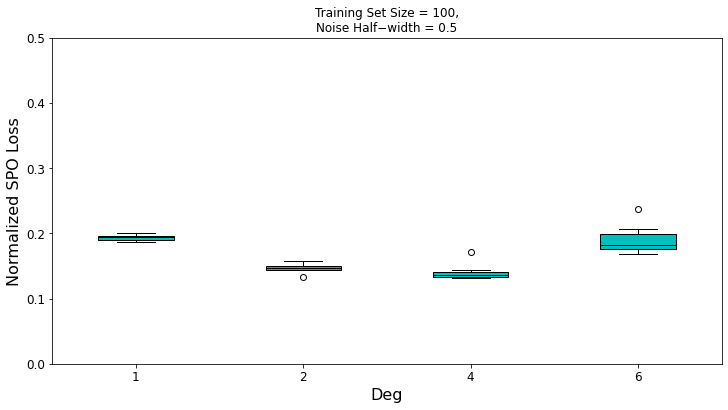

In [17]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df2_rf, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0.5')
plt.show()

### Training Set Size = 1000, Noise Half−width = 0

In [18]:
# set up
n = 1000 # number of data
p = 5 # size of feature
e = 0 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [19]:
# init DataFrame
df3_lr = pd.DataFrame(columns = degs)
df3_rf = pd.DataFrame(columns = degs)

In [20]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        lr_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df3_lr = df3_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 276.92it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.16it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.21it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 257.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 275.49it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.06it/s]


Normalized SPO Loss: 0.11%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 276.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 276.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.38it/s]


Normalized SPO Loss: 1.74%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.56it/s]


Normalized SPO Loss: 6.87%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.60it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.71it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 297.09it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 291.37it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.91it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.62it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.54it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.11it/s]


Normalized SPO Loss: 1.60%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.07it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 324.38it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.78it/s]


Normalized SPO Loss: 5.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.12it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.61it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 393.44it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.10it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.42it/s]


Normalized SPO Loss: 0.11%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.92it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.78it/s]


Normalized SPO Loss: 1.96%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.96it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.22it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.12it/s]


Normalized SPO Loss: 7.33%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.28it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 290.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 262.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.16it/s]


Normalized SPO Loss: 0.18%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.11it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.32it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.82it/s]


Normalized SPO Loss: 2.54%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 378.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.52it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.67it/s]


Normalized SPO Loss: 9.03%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.36it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.30it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.70it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 385.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.41it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.53it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 394.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 389.67it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.23it/s]


Normalized SPO Loss: 1.55%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.96it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.14it/s]


Normalized SPO Loss: 4.58%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.38it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.22it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.35it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.12it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.80it/s]


Normalized SPO Loss: 0.18%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 291.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 225.14it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.14it/s]


Normalized SPO Loss: 2.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 382.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.25it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.25it/s]


Normalized SPO Loss: 7.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 382.66it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.55it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.69it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 289.35it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 286.54it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.10it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.53it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.88it/s]


Normalized SPO Loss: 1.85%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.76it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.18it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.89it/s]


Normalized SPO Loss: 5.36%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 297.12it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.13it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.78it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 376.75it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.17it/s]


Normalized SPO Loss: 0.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.11it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.59it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.29it/s]


Normalized SPO Loss: 2.84%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.62it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.14it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.52it/s]


Normalized SPO Loss: 9.62%



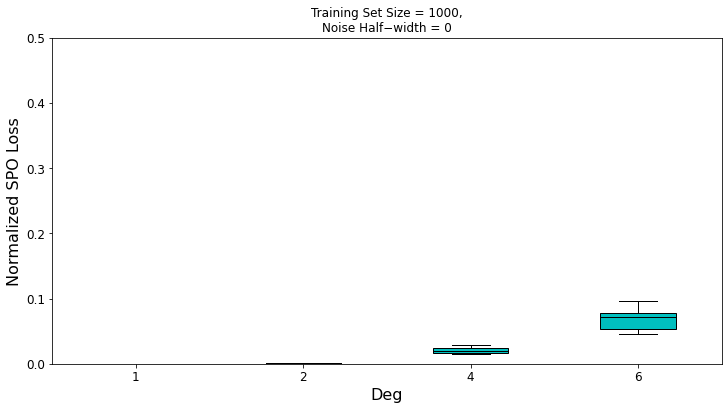

In [21]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df3_lr, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0')
plt.show()

In [22]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        rf_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df3_rf = df3_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.91it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.55it/s]


Normalized SPO Loss: 0.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 288.54it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.97it/s]


Normalized SPO Loss: 0.44%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.44it/s]


Normalized SPO Loss: 1.02%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 281.96it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.47it/s]


Normalized SPO Loss: 2.69%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.17it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.45it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.72it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.89it/s]


Normalized SPO Loss: 0.37%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 379.85it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.63it/s]


Normalized SPO Loss: 1.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 390.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.58it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.15it/s]


Normalized SPO Loss: 2.83%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.62it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.85it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.20it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.85it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.03it/s]


Normalized SPO Loss: 0.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.59it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.96it/s]


Normalized SPO Loss: 1.21%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 264.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 290.96it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.80it/s]


Normalized SPO Loss: 2.33%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 404.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 391.81it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.86it/s]


Normalized SPO Loss: 0.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.70it/s]


Normalized SPO Loss: 0.38%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.76it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.73it/s]


Normalized SPO Loss: 1.10%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.51it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.66it/s]


Normalized SPO Loss: 3.01%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 385.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 387.55it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.97it/s]


Normalized SPO Loss: 0.19%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.54it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.87it/s]


Normalized SPO Loss: 0.54%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.53it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.33it/s]


Normalized SPO Loss: 1.57%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.62it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.13it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.08it/s]


Normalized SPO Loss: 3.38%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.49it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.90it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.11it/s]


Normalized SPO Loss: 0.18%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.44it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 259.98it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.33it/s]


Normalized SPO Loss: 0.39%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.14it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.39it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.37it/s]


Normalized SPO Loss: 1.06%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.96it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.73it/s]


Normalized SPO Loss: 2.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.02it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.75it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.96it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.16it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.65it/s]


Normalized SPO Loss: 0.44%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.47it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.40it/s]


Normalized SPO Loss: 0.96%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.44it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.48it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.94it/s]


Normalized SPO Loss: 1.64%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.60it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.86it/s]


Normalized SPO Loss: 0.10%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.46it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.79it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.59it/s]


Normalized SPO Loss: 0.26%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.11it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.99it/s]


Normalized SPO Loss: 0.71%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 392.89it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 381.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.97it/s]


Normalized SPO Loss: 2.23%



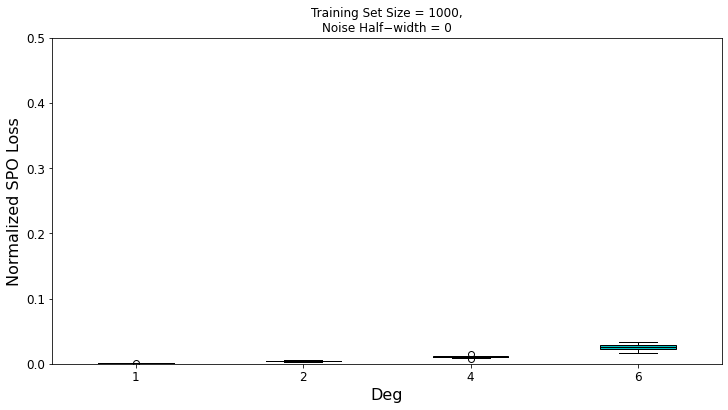

In [23]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df3_rf, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0')
plt.show()

### Training Set Size = 1000, Noise Half−width = 0.5

In [24]:
# set up
n = 1000 # number of data
p = 5 # size of feature
e = 0.5 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [25]:
# init DataFrame
df4_lr = pd.DataFrame(columns = degs)
df4_rf = pd.DataFrame(columns = degs)

In [26]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        lr_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df4_lr = df4_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.69it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 286.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.53it/s]


Normalized SPO Loss: 15.76%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.79it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.97it/s]


Normalized SPO Loss: 10.56%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.71it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 294.79it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.93it/s]


Normalized SPO Loss: 8.24%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 383.92it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.39it/s]


Normalized SPO Loss: 12.40%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.72it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.93it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.42it/s]


Normalized SPO Loss: 14.77%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.31it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.32it/s]


Normalized SPO Loss: 9.59%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.87it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.54it/s]


Normalized SPO Loss: 7.62%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.09it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.85it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.80it/s]


Normalized SPO Loss: 9.57%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.59it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.31it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.57it/s]


Normalized SPO Loss: 16.19%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 388.41it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.38it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.38it/s]


Normalized SPO Loss: 11.69%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.87it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 381.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.33it/s]


Normalized SPO Loss: 9.89%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.76it/s]


Normalized SPO Loss: 14.22%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.22it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.30it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.64it/s]


Normalized SPO Loss: 15.73%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.92it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.20it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.03it/s]


Normalized SPO Loss: 11.06%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 288.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.82it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.25it/s]


Normalized SPO Loss: 9.71%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.31it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.00it/s]


Normalized SPO Loss: 15.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.69it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.64it/s]


Normalized SPO Loss: 16.66%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.96it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.93it/s]


Normalized SPO Loss: 11.91%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 383.38it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.50it/s]


Normalized SPO Loss: 9.49%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 381.06it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 383.24it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.26it/s]


Normalized SPO Loss: 12.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 376.13it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.74it/s]


Normalized SPO Loss: 16.36%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 385.14it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.70it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.46it/s]


Normalized SPO Loss: 11.34%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 378.06it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.18it/s]


Normalized SPO Loss: 9.70%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.74it/s]


Normalized SPO Loss: 14.63%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.22it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.24it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.03it/s]


Normalized SPO Loss: 15.84%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.85it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 324.45it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.71it/s]


Normalized SPO Loss: 10.76%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.89it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.06it/s]


Normalized SPO Loss: 8.38%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.55it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.73it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.54it/s]


Normalized SPO Loss: 11.29%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.66it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.17it/s]


Normalized SPO Loss: 14.92%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.59it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.33it/s]


Normalized SPO Loss: 9.88%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.72it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.39it/s]


Normalized SPO Loss: 8.50%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.27it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.98it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.40it/s]


Normalized SPO Loss: 14.49%



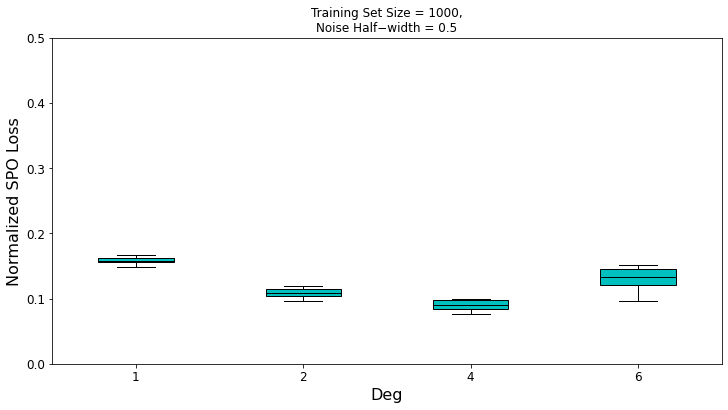

In [27]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df4_lr, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0.5')
plt.show()

In [28]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        rf_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df4_rf = df4_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.07it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.94it/s]


Normalized SPO Loss: 17.92%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 284.15it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 287.53it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.18it/s]


Normalized SPO Loss: 12.03%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 387.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 378.26it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.18it/s]


Normalized SPO Loss: 8.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.84it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.80it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.12it/s]


Normalized SPO Loss: 8.27%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.66it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.22it/s]


Normalized SPO Loss: 17.09%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.89it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.50it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.95it/s]


Normalized SPO Loss: 11.28%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.23it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 386.12it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.24it/s]


Normalized SPO Loss: 7.58%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.29it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.77it/s]


Normalized SPO Loss: 7.96%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.82it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.46it/s]


Normalized SPO Loss: 17.79%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.88it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.14it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.78it/s]


Normalized SPO Loss: 13.08%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.87it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.94it/s]


Normalized SPO Loss: 11.20%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.38it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 324.46it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.84it/s]


Normalized SPO Loss: 12.33%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.65it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.85it/s]


Normalized SPO Loss: 18.38%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.96it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.88it/s]


Normalized SPO Loss: 13.47%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.62it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.19it/s]


Normalized SPO Loss: 9.07%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 381.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 290.38it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.75it/s]


Normalized SPO Loss: 9.60%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.11it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.08it/s]


Normalized SPO Loss: 19.31%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.98it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.50it/s]


Normalized SPO Loss: 14.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.81it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.48it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.87it/s]


Normalized SPO Loss: 10.58%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.23it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.86it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.71it/s]


Normalized SPO Loss: 11.06%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 382.87it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 395.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.23it/s]


Normalized SPO Loss: 18.37%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.40it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.55it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.73it/s]


Normalized SPO Loss: 12.42%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 402.27it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.28it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.90it/s]


Normalized SPO Loss: 9.45%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.98it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.69it/s]


Normalized SPO Loss: 9.24%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.43it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.92it/s]


Normalized SPO Loss: 17.79%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.84it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.02it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.73it/s]


Normalized SPO Loss: 12.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.88it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.31it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.96it/s]


Normalized SPO Loss: 8.55%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.75it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.66it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.82it/s]


Normalized SPO Loss: 8.62%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.85it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.67it/s]


Normalized SPO Loss: 16.68%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 247.61it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.94it/s]


Normalized SPO Loss: 11.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.82it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.73it/s]


Normalized SPO Loss: 7.44%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.01it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.91it/s]


Normalized SPO Loss: 7.94%



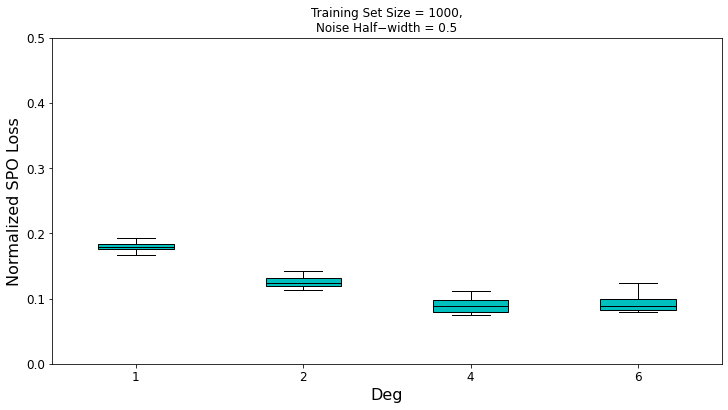

In [29]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df4_rf, boxprops=dict(facecolor='c', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0.5')
plt.show()

## Save File 

In [30]:
df1_lr.to_csv('./res/lr_n100.csv', index=False)
df1_rf.to_csv('./res/rf_n100.csv', index=False)
df2_lr.to_csv('./res/lr_n100_noise.csv', index=False)
df2_rf.to_csv('./res/rf_n100_noise.csv', index=False)
df3_lr.to_csv('./res/lr_n1000.csv', index=False)
df3_rf.to_csv('./res/rf_n1000.csv', index=False)
df4_lr.to_csv('./res/lr_n1000_noise.csv', index=False)
df4_rf.to_csv('./res/rf_n1000_noise.csv', index=False)